| Method | Dataset1 Training Accuracy | Dataset1 Testing Accuracy | Dataset2 Training Accuracy | Dataset2 Testing Accuracy |
| DT using gini (without pruning) | 1.0000 | 0.6937 | 1.0000 | 0.8655 |
| DT using gini (with pruning) | 0.5489 | 0.5938 | 0.8904 | 0.8882 |
| DT using entropy (without pruning) | 1.0000 | 0.6344 | 1.0000 | 0.8721 |
| DT using entropy (with pruning) | 0.5872 | 0.5656 | 0.8891 | 0.8880 |
Correctly Predict: 8030 Out 9043
      Actual Output  Predictions
0                 0            0
1                 1            0
2                 0            0
3                 0            0
4                 0            0
...             ...          ...
9038              1            0
9039              0            0
9040              0            0
9041              1            0
9042              0            0

[9043 rows x 2 columns]


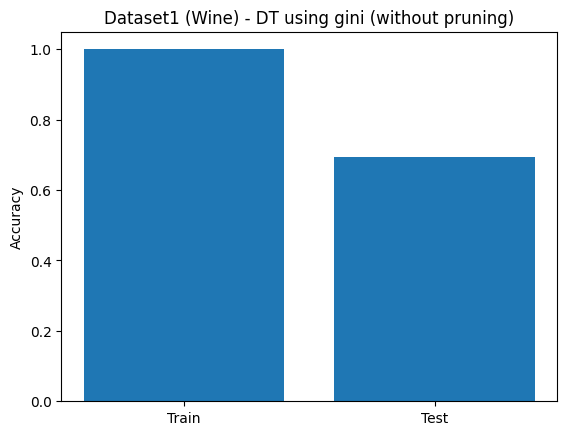

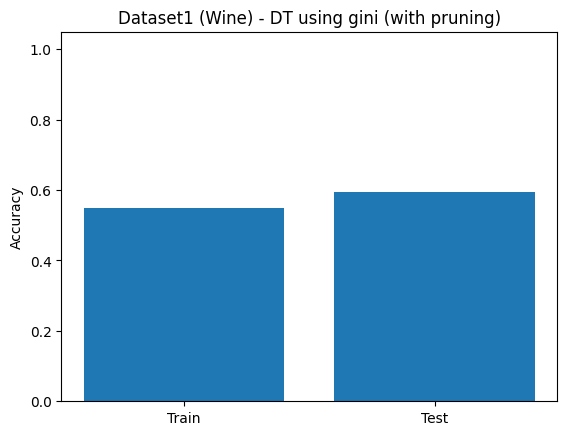

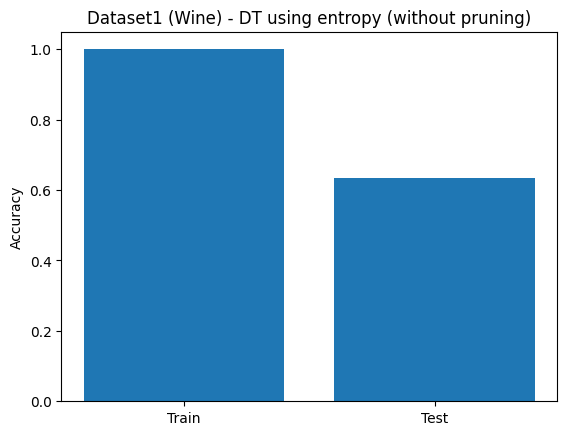

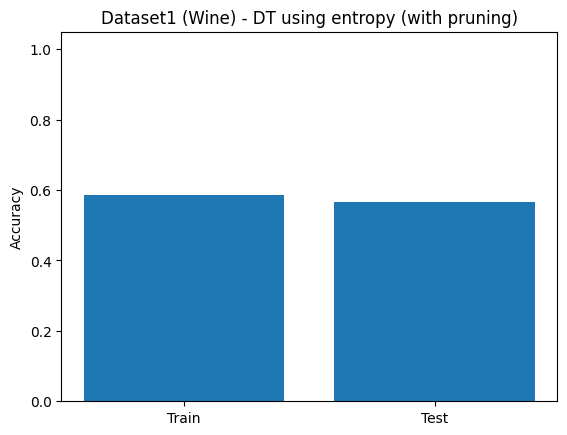

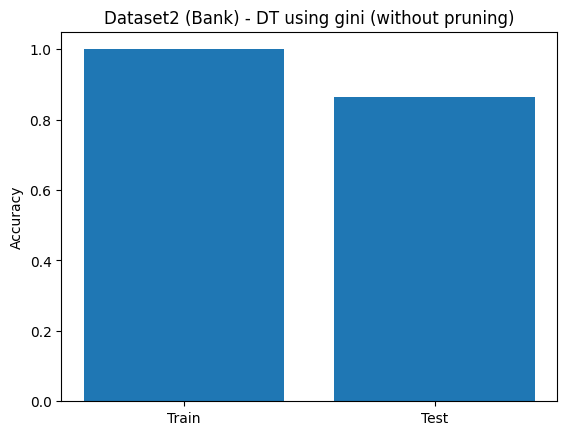

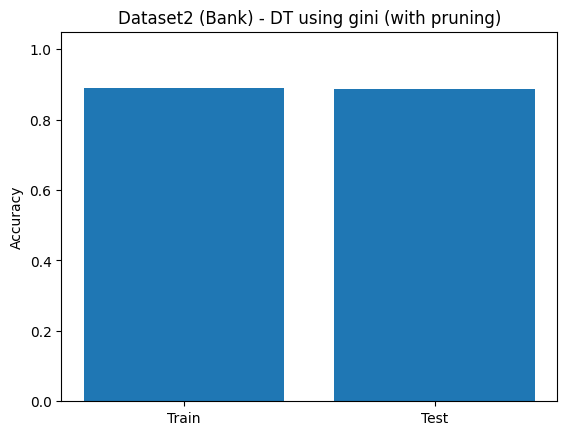

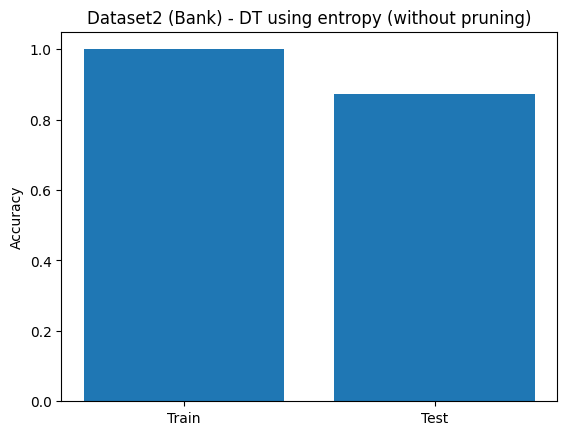

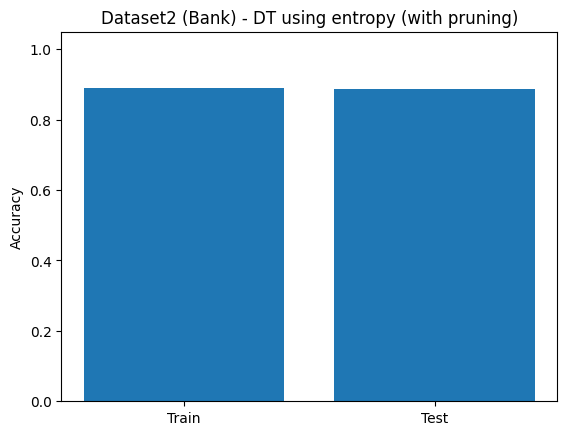

In [1]:
#TASK 1
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

wine_df = pd.read_csv('winequality-red.csv', sep=';')
X_wine = wine_df.drop('quality', axis=1)
y_wine = wine_df['quality']
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=0)

bank_df = pd.read_csv('bank-full.csv', sep=';')


categorical_cols = bank_df.select_dtypes(include=['object']).columns.drop('y')
bank_df_encoded = pd.get_dummies(bank_df, columns=categorical_cols, drop_first=True)
X_bank = bank_df_encoded.drop('y', axis=1)
y_bank = LabelEncoder().fit_transform(bank_df['y'])
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X_bank, y_bank, test_size=0.2, random_state=0)

datasets = [
    ('Dataset1 (Wine)', X_train_wine, X_test_wine, y_train_wine, y_test_wine),
    ('Dataset2 (Bank)', X_train_bank, X_test_bank, y_train_bank, y_test_bank)
]

methods = [
    ('DT using gini (without pruning)', 'gini', 0.0),
    ('DT using gini (with pruning)', 'gini', 0.015),
    ('DT using entropy (without pruning)', 'entropy', 0.0),
    ('DT using entropy (with pruning)', 'entropy', 0.015)
]

results = {}
for name, X_train, X_test, y_train, y_test in datasets:
    results[name] = {}
    for method, crit, ccp in methods:
        clf = DecisionTreeClassifier(criterion=crit, ccp_alpha=ccp, random_state=0)
        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        results[name][method] = (train_acc, test_acc)


print('| Method | Dataset1 Training Accuracy | Dataset1 Testing Accuracy | Dataset2 Training Accuracy | Dataset2 Testing Accuracy |')
for method in [m[0] for m in methods]:
    d1_train, d1_test = results['Dataset1 (Wine)'][method]
    d2_train, d2_test = results['Dataset2 (Bank)'][method]
    print(f'| {method} | {d1_train:.4f} | {d1_test:.4f} | {d2_train:.4f} | {d2_test:.4f} |')

clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015, random_state=0)
clf.fit(X_train_bank, y_train_bank)
y_pred_bank = clf.predict(X_test_bank)
correct = sum(y_test_bank == y_pred_bank)
total = len(y_test_bank)
print(f'Correctly Predict: {correct} Out {total}')

comparison = pd.DataFrame({'Actual Output': y_test_bank, 'Predictions': y_pred_bank})
print(comparison)


for name in results:
    for method in [m[0] for m in methods]:
        train_acc, test_acc = results[name][method]
        plt.bar(['Train', 'Test'], [train_acc, test_acc])
        plt.title(f'{name} - {method}')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1.05)
        plt.show()

In [7]:
#TASK 2
import pandas as pd
import numpy as np


data = {
    'ID': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'Age': ['Young','Young','Young','Young','Young','Middle','Middle','Middle','Middle','Middle','Old','Old','Old','Old','Old'],
    'Job_Status': ['False','False','True','True','False','False','False','True','False','False','False','False','True','True','False'],
    'Owns_House': ['False','False','False','True','False','False','False','True','True','True','True','True','False','False','False'],
    'Credit_Rating': ['Fair','Good','Good','Fair','Fair','Fair','Good','Good','Excellent','Excellent','Excellent','Good','Good','Excellent','Fair'],
    'Class': ['No','No','Yes','Yes','No','No','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','No']
}
df = pd.DataFrame(data)
df.to_excel('task2_dataset.xlsx', index=False)


def entropy(s):
    counts = np.unique(s, return_counts=True)[1]
    probabilities = counts / len(s)
    return -np.sum(probabilities * np.log2(probabilities))

def info_gain(df, attribute, target):
    total_entropy = entropy(df[target])
    values, counts = np.unique(df[attribute], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / len(df)) * entropy(df[df[attribute] == values[i]][target]) for i in range(len(values))])
    return total_entropy - weighted_entropy

attributes = ['Age', 'Job_Status', 'Owns_House', 'Credit_Rating']
igs = {attr: info_gain(df, attr, 'Class') for attr in attributes}
print('Information Gains:', igs)
root = max(igs, key=igs.get)
print('Root Node:', root)

Information Gains: {'Age': np.float64(0.08300749985576883), 'Job_Status': np.float64(0.32365019815155627), 'Owns_House': np.float64(0.4199730940219749), 'Credit_Rating': np.float64(0.36298956253708536)}
Root Node: Owns_House


In [3]:
#TASK 3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('cancer patient data sets.csv')

# Perform EDA
print('Describe:\n', df.describe())
print('Info:\n', df.info())

# Check balance (target 'Level')
print('Balance:\n', df['Level'].value_counts(normalize=True))

# Check empty, categorical, duplicates
print('Nulls:', df.isnull().sum().sum())
print('Duplicates:', df.duplicated().sum())
# Handling: None needed (0 nulls/dups). If nulls: df = df.fillna(df.median(numeric_only=True)), chosen for central tendency without outliers.
# If dups: df = df.drop_duplicates(), to prVent overfitting on repeated data.
# Categorical: 'Patient Id' is ID, drop; 'Level' encode; 'Gender' numeric already.

# Correlation and feature selection
le = LabelEncoder()
df['Level_num'] = le.fit_transform(df['Level'])
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()['Level_num'].abs().sort_values(ascending=False)
print('Correlations:\n', corr)
selected = corr[(corr > 0.5) & (corr.index != 'Level_num')].index.tolist()
print('Selected Features:', selected)

# Scaling: Not required (DT invariant to scale; features 1-9 similar).

# Split dataset
X = numeric_df.drop('Level_num', axis=1)
y = df['Level_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7, random_state=0)
print('Shapes: Train', X_train.shape, 'Val', X_val.shape, 'Test', X_test.shape)
#To evaluate/tune model (e.g., hyperparameters) during training without using test set, preventing data leakage and overfitting to test.

# Apply DT and accuracies
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))
print('Training Accuracy:', train_acc)
print('Testing Accuracy:', test_acc)

Describe:
              index          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000   
mean    499.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       0.000000    14.000000     1.000000         1.0000     1.000000   
25%     249.750000    27.750000     1.000000         2.0000     2.000000   
50%     499.500000    36.000000     1.000000         3.0000     5.000000   
75%     749.250000    45.000000     2.000000         6.0000     7.000000   
max     999.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999      

In [6]:
#TASK 4
import pandas as pd
import numpy as np

data = {
    'Student': ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10'],
    'Prior_Experience': ['Yes','No','Yes','No','Yes','No','Yes','Yes','Yes','No'],
    'Course': ['Programming','Programming','History','Programming','English','Programming','Programming','Mathematics','Programming','Programming'],
    'Time': ['Day','Day','Night','Night','Day','Day','Day','Night','Night','Night'],
    'Success': ['Yes','No','No','Yes','Yes','No','No','Yes','Yes','No']
}
df = pd.DataFrame(data)
df['Success_num'] = df['Success'].map({'Yes':1, 'No':0})
df.to_excel('task4_dataset.xlsx', index=False)

def gini(s):
    if len(s) == 0: return 0
    counts = np.bincount(s)
    probabilities = counts / len(s)
    return 1 - np.sum(probabilities ** 2)

def gini_gain(df, attribute, target):
    parent_gini = gini(df[target])
    if df[attribute].dtype == 'object':
        values, counts = np.unique(df[attribute], return_counts=True)
        weighted_gini = np.sum([(counts[i] / len(df)) * gini(df[df[attribute] == values[i]][target]) for i in range(len(values))])
    else:
        sorted_idx = df[attribute].argsort()
        sorted_target = df[target].iloc[sorted_idx]
        sorted_attr = df[attribute].iloc[sorted_idx]
        potential_splits = (sorted_attr[:-1] + sorted_attr[1:]) / 2
        min_gini = float('inf')
        for split in potential_splits:
            left = sorted_target[sorted_attr <= split]
            right = sorted_target[sorted_attr > split]
            if len(left) == 0 or len(right) == 0: continue
            w_gini = (len(left)/len(df)) * gini(left) + (len(right)/len(df)) * gini(right)
            if w_gini < min_gini:
                min_gini = w_gini
        weighted_gini = min_gini if min_gini != float('inf') else parent_gini
    return parent_gini - weighted_gini

attributes = ['Prior_Experience', 'Course', 'Time']
gains = {attr: gini_gain(df, attr, 'Success_num') for attr in attributes}
print('Gini Gains:', gains)
root = max(gains, key=gains.get)
print('Root Node:', root)

Gini Gains: {'Prior_Experience': np.float64(0.08333333333333331), 'Course': np.float64(0.15714285714285708), 'Time': np.float64(0.020000000000000018)}
Root Node: Course
